In [12]:
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [13]:
NUMBER_OF_CLUSTERS = 3

In [14]:
dataset = pd.read_csv('files/feature_model_dataset.csv')

dataset.head()

,Feature Model,Number of features (NF),Number of Mandatory Features (NM),Number of top features (NTop),Number of leaf Features (NLeaf),Depth of tree Max (DT Max),Cognitive Complexity of a Feature Model (CogC),Feature EXtendibility (FEX),Flexibility of configuration (FoC),Single Cyclic Dependent Features (SCDF),Multiple Cyclic Dependent Features (MCDF),Number of Features Referenced in Constraints Mean (Rden),Ratio of variability (RoV),Number of valid configurations (NVC),Number Groups Or (NGOr),Number Groups XOR (NGXOr)
0,Simple e-shop,10,3,4,7,3,2,9,0.1,1,1,1.0,2.20,20.0,1,1
1,Prontuário Eletrônico de Pacientes,10,5,4,6,2,0,6,0.4,0,0,0.0,2.25,10.0,0,0
2,Simnumero,10,2,2,2,8,0,2,0.7,0,0,0.0,1.00,8.0,0,0
3,MobileMedia,10,2,4,7,3,1,7,0.4,0,0,0.0,2.50,30.0,0,1
4,CIMS PL,10,9,5,8,2,0,8,0.0,0,0,0.0,4.50,1.0,0,0


In [15]:
min_max_scaler = MinMaxScaler().fit(dataset.iloc[:, 1:])

In [16]:
X = min_max_scaler.transform(dataset.iloc[:, 1:])

In [17]:
clustering = AgglomerativeClustering(n_clusters=NUMBER_OF_CLUSTERS).fit(X)

In [18]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,

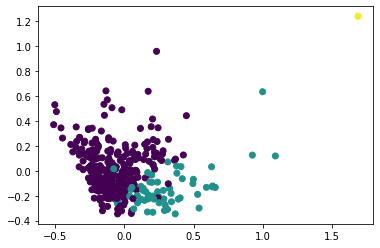

In [19]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)

X_ = pca.transform(X)

plt.scatter(X_[:, 0], X_[:, 1], c=clustering.labels_)
plt.show()

In [20]:
# Save Dataset With Labels

for i in range(0, NUMBER_OF_CLUSTERS):
    csv_string = ''
    
    for index, line in enumerate(dataset.values):
        if clustering.labels_[index] == i:
            for column in line:
                csv_string += str(column).replace(',', '-') + ','
            csv_string += str(clustering.labels_[index]) + '\n'  

    with open('files/cluster-' + str(i) +'.csv', 'w', encoding="utf-8") as file:
        file.write(csv_string)